In [1]:
import numpy as np
from os import path
import json

from rec2cal.utils import make_data,save_np_data, load_np_data
from rec2cal.data_paths import rep_json, data_path

# Sentence Transformer


The Next Line Loads Sentence Transformer which is a model that takes in a sentence and returns a vector. Mathematically its just a function that looks like this:

\begin{align}
f: \mathbb{V}^\mathbb{N} \rightarrow \mathbb{R}^N
\end{align}

Where $\mathbb{V}$ is the english vocabulary (the set of all words) , $\mathbb{N}$ is he natral numbers, $\mathbb{R}^D$ is the set of vectors of dimension $N$ (for example if $N=2$ then the vector ${1 \choose 0} \in \mathbb{R}^2$). Finally $\mathbb{V}^\mathbb{N}$ represents the set all possible sentences that can be made with the vocbulary b.

As a trivial example imagine the following scenario:

\begin{align}
\mathbb{V} = \{\mathrm{Hi}, \mathrm{Bye}\}
\end{align}

Then

\begin{align}
\mathbb{V}^\mathbb{N} = \left\{"\mathrm{Hi}", "\mathrm{Bye}", "\mathrm{Hi} \mathrm{Bye}", "\mathrm{Bye}", "\mathrm{Hi}\mathrm{Hi}", "\mathrm{Hi}\mathrm{Hi}\mathrm{Hi}", ...., "\mathrm{Bye}... \mathrm{Bye})", ... \right\}
\end{align}

Clearly the set of all sentences is infinite even for a small vocabulary of 2 words. Now again imagine $N=2$ then applying $f$ to our fake sentences could look like this for example:

\begin{align}
f("\mathrm{Bye}") = {1 \choose 0.2}, \; \; f("\mathrm{Bye}\mathrm{Hi}") = {0.013\choose -1.12}
\end{align}

We are going to use this to begin with as the recipie to image github repo has all its links broken

In [20]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

Now here is an example of this sentence embedder in action, look how it transform this sentence into a list of numbers (a vector in $\mathbb{R}^{384}$)

In [21]:
sentence = ['This framework generates embeddings for each input sentence']

#Sentences are encoded by calling model.encode()
embedding = model.encode(sentence)
print(embedding.shape)

(1, 384)


In [22]:
embedding;

Here is another example where we take 3 sentences and obtain a vector for each

In [23]:
sentences = ["Hi I am john", "The end of the world is near its all over", "I like pizza"]
embeddings = model.encode(sentences)
print(embeddings.shape) # This is a matrix where row one corresponds to "Hi I am John", Row 2 corresponds to "The end of the ..." and row 3 to "I like pizza ..."

(3, 384)


In [24]:
embeddings[1,1:10]

array([ 0.11835379,  0.27748957, -0.58381236,  0.58222026, -0.180025  ,
       -0.6082226 ,  0.09029325,  0.4639794 ,  0.04716253], dtype=float32)

I mounted my google drive where I can accesss the recipie file that I uploaded. 

In [25]:
recipies = json.load(open(rep_json, "rb"))

In [26]:
recipies[1];

Ok so Now we want to take any useful ingredient data and put it into a string and predict the energy (which is calories) so I am going to write  a little script that transforms the data into (sentence, energy) pairs so we can train a model or do retrieval.  

In [27]:
X_train, y_train  = make_data(recipies, "train")
X_test, y_test  = make_data(recipies, "test")
X_val, y_val = make_data(recipies, "val")

In [28]:
X_train[100], y_train[100]

('2 ounce of alcoholic beverage-tequila sunrise-canned, 4 ounce of orange juice-raw, 34 ounce of syrups-grenadine. Place ice cubes in a glass. Pour in tequila and orange juice. Slowly pour in grenadine and allow it to settle at the bottom of the glass before serving. Do not stir. Serve.',
 2696.60444)

In [29]:
X_test[100], y_test[100]

("1 cup of milk-buttermilk-fluid-cultured-lowfat, 1 tablespoon of onions-raw, 2 tablespoon of cornstarch, 2 tablespoon of soup-chicken broth or bouillon-dry, 1/2 teaspoon of spices-basil-dried, 1/2 teaspoon of spices-thyme-dried, 1/4 teaspoon of spices-pepper-black. Combine ingredients. This is a dry roux which can be stored in an airtight container and kept on hand till it's needed. When ready for soup, add in 2 c. of cool water and cook over medium heat, stirring constantly till it thickens. If soup is too thick, add in a little more water to thin. For cream of mushroom soup, add in some sliced mushrooms a few min before removing from the stove.",
 197.0)

In [30]:
X_val[100], y_val[100]

("500 g of ginger root-raw, 400 ml of vinegar-distilled, 160 g of sugars-granulated, 2 tablespoon of honey, 1 teaspoon of salt-table. Wash the spring ginger roots, and slice very very thinly without peeling (I used a vegetable peeler to slice it thinly). The ginger roots are not peeled, but do cut off any browned or discolored bits. Don't cut the red shoot ends off. They will turn the ginger a pretty pink color. Sprinkle the sliced ginger with a little salt (not listed), and mix up quickly. Leave it for a while. Make the sweet vinegar sauce: Put the vinegar, sugar, honey and salt in a pan and bring to a boil. Turn the heat down to low-medium, and simmer for 5 minutes. Turn off the heat. Pour into storage jars that have been sterilized in boiling water, and leave to cool. Bring water to a boil in another pan, and add the sliced ginger from Step 2, salt and all. Boil for 3 minutes, then drain well. Put the ginger slices in the sweet vinegar sauce filled jars while still hot. (They will t

In [31]:
y_train, y_test, y_val = np.array(y_train).reshape(-1,1), np.array(y_test).reshape(-1,1), np.array(y_val).reshape(-1,1)

In [32]:
len(X_train), len(X_test)

(35867, 7681)

Now get ready for the grand finalle we will transform these into vectors !!! (Its very slow as its turning 40k+ things into vectors)

In [33]:
# smaller = -1 #-1 # 35867# 10

vec_X_train = model.encode(X_train)
vec_X_test = model.encode(X_test)
vec_X_val = model.encode(X_val)

KeyboardInterrupt: 

In [17]:
# vec_X_train[:smaller].shape

(35865, 384)

In [2]:
train_file = path.join(data_path, "regr_model_2_vectors_train.npz")
test_file = path.join(data_path, "regr_model_2_vectors_test.npz")
val_file = path.join(data_path, "regr_model_2_vectors_validation.npz")

save = False

if save:
    save_np_data(train_file, vec_X_train, y_train)
    save_np_data(test_file, vec_X_test, y_test)
    save_np_data(val_file, vec_X_val, y_val) 

In [34]:
vec_X_train, y_train  = load_np_data(train_file)

In [35]:
vec_X_test, y_test  = load_np_data(test_file)

In [36]:
vec_X_val, y_val  = load_np_data(val_file)

In [37]:
vec_X_train.shape, vec_X_test.shape, vec_X_val.shape

((35866, 384), (7680, 384), (7686, 384))

Now that we have a vector dataset we can just train a regression model. I am going to use scikit-learn as this is just a quick and dirty prototype but it might be worth using keras and a more fancy network.

In [160]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

# This trains the model

#smaller = -1
learning_rate_init=0.001
alpha=0.0001

retrieval = True
adaptive = False

if adaptive:
    lr = "adaptive"
    
else:
    lr = "constant"
    
trainfull = False
if not retrieval:
    regr = MLPRegressor(
        hidden_layer_sizes=[600, 300, 300],
         random_state=10, max_iter=5000, learning_rate=lr, learning_rate_init= learning_rate_init,alpha=alpha)
         #random_state=1, max_iter=5000)
    if trainfull:
        regr = regr.fit(vec_X_train, y_train.flatten())
else:
    regr = KNeighborsRegressor(
      n_neighbors=8, metric="cosine", weights="distance").fit(vec_X_train, y_train.flatten())

In [161]:
vec_X_train.shape, y_train.shape

((35866, 384), (35866, 1))

In [162]:
from rec2cal.utils import train_model_iteratively, pick_best_model

n_iter = 100

if not retrieval and not trainfull:
    train_loss, val_loss, partial_fits = train_model_iteratively(
        regr, vec_X_train, y_train.flatten(), vec_X_val, y_val.flatten(), n_iter=n_iter)
    regr, index = pick_best_model(val_loss, partial_fits)

In [163]:
regr, index

(KNeighborsRegressor(metric='cosine', n_neighbors=8, weights='distance'), 80)

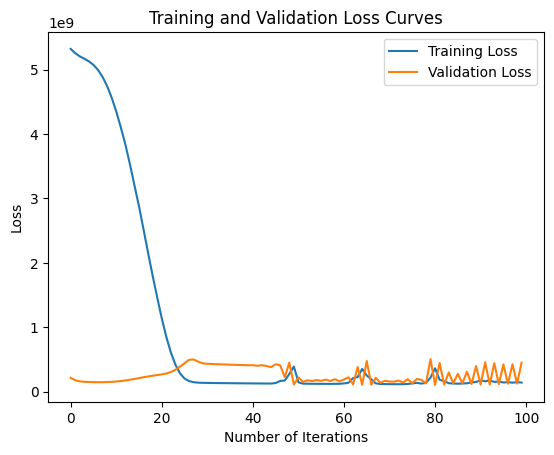

In [92]:
import matplotlib.pyplot as plt

if not trainfull:
    upto = 200
    plt.plot(train_loss[:upto], label='Training Loss')
    plt.plot(val_loss[:upto], label='Validation Loss')
    plt.title('Training and Validation Loss Curves')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f"val_error_{upto}_{lr}.png")

In [93]:
train_loss[53]-val_loss[53]

-42731985.736936405

In [94]:
val_loss[53]

165829652.07796642

In [95]:
(train_loss[53]-val_loss[53])/train_loss[53]

-0.34713887766606094

In [96]:
len(val_loss), len(train_loss)

(100, 100)

In [97]:
str(trainfull)

'False'

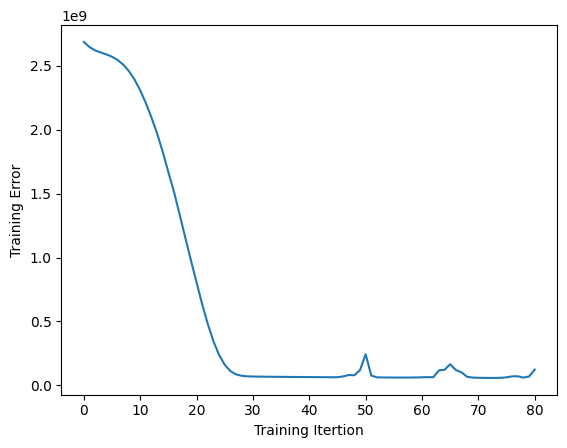

In [98]:
# !pip install matplotlib
import matplotlib.pyplot as plt

if not retrieval:
  plt.plot(regr.loss_curve_);
  plt.xlabel("Training Itertion")
  plt.ylabel("Training Error")
  min(regr.loss_curve_)

#saving graph one
if not trainfull:
    plt.savefig(f"plot600_{lr}_{learning_rate_init}_{alpha}.png")
else:
    plt.savefig(f"")

Based on the above plot the model does seem converged / to have converged quite quckly.

Now lets test the model !!! (we will look at the root mean squared error in calories to begin with), its lazy we can do better. If you look at the median absolute error it does suggest theres some outliers in the test result, its worth seeing what the recipie for the worst performances is and to try and diagnose why this is not working 

In [164]:
save = True
print(retrieval)


retrieval_mode = f"mlp_{lr}"  if not retrieval else  "knn"

train_file = path.join(data_path, f"regr_{retrieval_mode}_predictions_train_val_best.npz")
test_file = path.join(data_path, f"regr_{retrieval_mode}_predictions_test_val_best.npz")
val_file = path.join(data_path, f"regr_{retrieval_mode}_predictions_validation_val_best.npz")

if save:

    save_np_data(train_file, vec_X_train, regr.predict(vec_X_train)) 
    save_np_data(test_file, vec_X_test, regr.predict(vec_X_test))
    save_np_data(val_file, vec_X_val, regr.predict(vec_X_val)) 
print(retrieval_mode)

True
knn


In [100]:
retrieval

False

In [101]:
retrieval_mode

'mlp'

In [102]:
train_file

'c:\\users\\vargf\\arturo_projects\\pic2cal\\data\\regr300_mlp_model_2_predictions_train_val_best.npz'

In [103]:
val_file

'c:\\users\\vargf\\arturo_projects\\pic2cal\\data\\regr300_mlp_model_2_predictions_validation_val_best.npz'

In [104]:
test_file

'c:\\users\\vargf\\arturo_projects\\pic2cal\\data\\regr300_mlp_model_2_predictions_test_val_best.npz'

In [105]:
data_path

'c:\\users\\vargf\\arturo_projects\\pic2cal\\data'

In [106]:
cd c:\\users\\vargf\\arturo_projects\\pic2cal\\data

c:\users\vargf\arturo_projects\pic2cal\data


In [107]:
pwd

'c:\\users\\vargf\\arturo_projects\\pic2cal\\data'

In [165]:
ls c:\users\vargf\arturo_projects\pic2cal\data

 Volume in drive C is OS
 Volume Serial Number is D0E0-A856

 Directory of c:\users\vargf\arturo_projects\pic2cal\data

30/04/2023  23:49    <DIR>          .
18/03/2023  00:58    <DIR>          ..
29/12/2022  01:35    <DIR>          .ipynb_checkpoints
30/04/2023  00:47    <DIR>          net 600
30/04/2023  21:45    <DIR>          non adptive
17/03/2023  01:54        46,256,178 open_ai.json
18/03/2023  00:05        46,256,178 open_ai_play.json
18/03/2023  00:45        44,713,914 open_ai_simple_prompts.csv
17/03/2023  02:20        46,256,178 open_ai_test.json
18/03/2023  00:45        46,256,178 open_ai_train_play.json
29/04/2023  21:40            25,809 plot1_adaptive_0.01_0.0001.png
30/04/2023  21:34            10,917 plot2_knn.png
29/04/2023  16:28            13,474 plot2_knn_validation_200_adaptive_0.001.png
29/04/2023  16:29            13,474 plot2_knn2.png
29/04/2023  21:23             9,822 plot2_mlp_validation_200_adaptive_0.001.png
29/04/2023  21:41            10,084 plot2_mlp_va

In [109]:
ls

 Volume in drive C is OS
 Volume Serial Number is D0E0-A856

 Directory of c:\users\vargf\arturo_projects\pic2cal\data

30/04/2023  20:05    <DIR>          .
18/03/2023  00:58    <DIR>          ..
29/12/2022  01:35    <DIR>          .ipynb_checkpoints
30/04/2023  00:47    <DIR>          net 600
29/04/2023  21:20    <DIR>          non adptive
17/03/2023  01:54        46,256,178 open_ai.json
18/03/2023  00:05        46,256,178 open_ai_play.json
18/03/2023  00:45        44,713,914 open_ai_simple_prompts.csv
17/03/2023  02:20        46,256,178 open_ai_test.json
18/03/2023  00:45        46,256,178 open_ai_train_play.json
29/04/2023  21:40            25,809 plot1_adaptive_0.01_0.0001.png
29/04/2023  20:29            11,490 plot2_knn.png
29/04/2023  16:28            13,474 plot2_knn_validation_200_adaptive_0.001.png
29/04/2023  16:29            13,474 plot2_knn2.png
29/04/2023  21:23             9,822 plot2_mlp_validation_200_adaptive_0.001.png
29/04/2023  21:41            10,084 plot2_mlp_va

In [110]:
c:\\users\\vargf\\arturo_projects\\pic2cal\\data\\regr_knn_model_2_predictions_train_val_best.npz

SyntaxError: unexpected character after line continuation character (2000905691.py, line 1)

In [111]:
pwd

'c:\\users\\vargf\\arturo_projects\\pic2cal\\data'

In [112]:
ls

 Volume in drive C is OS
 Volume Serial Number is D0E0-A856

 Directory of c:\users\vargf\arturo_projects\pic2cal\data

30/04/2023  20:05    <DIR>          .
18/03/2023  00:58    <DIR>          ..
29/12/2022  01:35    <DIR>          .ipynb_checkpoints
30/04/2023  00:47    <DIR>          net 600
29/04/2023  21:20    <DIR>          non adptive
17/03/2023  01:54        46,256,178 open_ai.json
18/03/2023  00:05        46,256,178 open_ai_play.json
18/03/2023  00:45        44,713,914 open_ai_simple_prompts.csv
17/03/2023  02:20        46,256,178 open_ai_test.json
18/03/2023  00:45        46,256,178 open_ai_train_play.json
29/04/2023  21:40            25,809 plot1_adaptive_0.01_0.0001.png
29/04/2023  20:29            11,490 plot2_knn.png
29/04/2023  16:28            13,474 plot2_knn_validation_200_adaptive_0.001.png
29/04/2023  16:29            13,474 plot2_knn2.png
29/04/2023  21:23             9,822 plot2_mlp_validation_200_adaptive_0.001.png
29/04/2023  21:41            10,084 plot2_mlp_va

pred_X_train, pred_y_train = load_np_data("regr_knn_model_2_predictions_train.npz")
pred_X_test, pred_y_test = load_np_data("regr_knn_model_2_predictions_test.npz")
pred_X_val, pred_y_val = load_np_data("regr_knn_model_2_predictions_validation.npz")

In [166]:
pred_X_train, pred_y_train = load_np_data(train_file)
pred_X_test, pred_y_test = load_np_data(test_file)
pred_X_val, pred_y_val = load_np_data(val_file)

In [167]:
delta_test= pred_y_test - y_test[:].flatten()
print(delta_test.shape)
rmse_test = np.sqrt(np.mean((delta_test) ** 2))
rmae_test = np.sqrt(np.median((delta_test) ** 2))

rmse_test, rmae_test

(7680,)


(14749.273817123565, 5864.840504229356)

In [168]:
delta_train = pred_y_train - y_train[:].flatten()
print(delta_train.shape)
rmse_train = np.sqrt(np.mean((delta_train) ** 2))
rmae_train = np.sqrt(np.median((delta_train) ** 2))
mae_train = np.median(np.abs(delta_train))

rmse_train, rmae_train, mae_train

(35866,)


(46.110645708026894, 0.0, 0.0)

In [169]:
delta_validation = pred_y_val - y_val[:].flatten()
print(delta_validation.shape)
rmse_validation = np.sqrt(np.mean((delta_validation)**2))
rmae_validation = np.sqrt(np.median((delta_validation)**2))

rmse_validation, rmae_validation

(7686,)


(13847.26460623629, 5755.0983255020565)

In [170]:
#!pip install --upgrade pandas

In [119]:
#!pip install --upgrade notebook

In [120]:
retrieval

False

In [121]:
# %matplotlib auto

In [122]:
pwd


'c:\\users\\vargf\\arturo_projects\\pic2cal\\data'

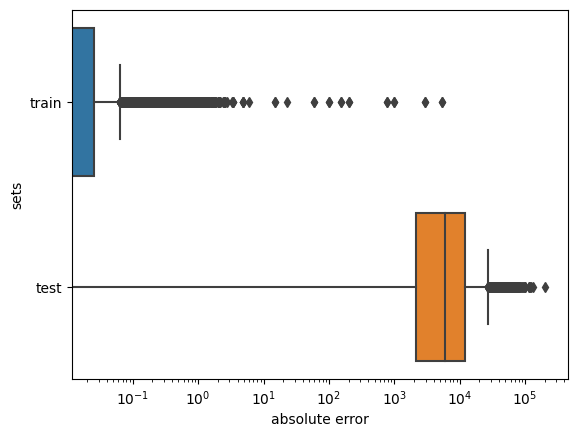

In [171]:
# !pip install seaborn
# !pip install pandas==1.3.0
import seaborn as sns
import pandas as pd


labels = ["train"] * len(delta_train) + ["test"] * len(delta_test) 
rmse_train_all = list(np.abs(delta_train)) + list(np.abs(delta_test))

df = pd.DataFrame({
    "absolute error": rmse_train_all,
    "sets": labels
})

ax = sns.boxplot(data=df, x="absolute error", y="sets")
ax.set_xscale('log')
fig = ax.get_figure()
#saving graph 2

fig.savefig(f"plot2_{retrieval_mode}.png")

This is the error in kCal per 100g , pretty easy quantity to interpret.

We can see that the test error is at 145 kcals per 100g whilst the train error is 20kcal per 100g thus this model does not generalise well (it overfits). Maybe we need: 

* Better recipie specific embeddings
* Maybe using image data is better
* The way we encoded recipies into sentences might have not been the smartest
* We could try training the model for longer.

In [173]:
delta_test[100]

5216.534011933108

In [174]:
X_test[100]

"1 cup of milk-buttermilk-fluid-cultured-lowfat, 1 tablespoon of onions-raw, 2 tablespoon of cornstarch, 2 tablespoon of soup-chicken broth or bouillon-dry, 1/2 teaspoon of spices-basil-dried, 1/2 teaspoon of spices-thyme-dried, 1/4 teaspoon of spices-pepper-black. Combine ingredients. This is a dry roux which can be stored in an airtight container and kept on hand till it's needed. When ready for soup, add in 2 c. of cool water and cook over medium heat, stirring constantly till it thickens. If soup is too thick, add in a little more water to thin. For cream of mushroom soup, add in some sliced mushrooms a few min before removing from the stove."

In [38]:
ls

 Volume in drive C is OS
 Volume Serial Number is D0E0-A856

 Directory of C:\Users\vargf\arturo_projects\pic2cal\notebooks

26/04/2023  01:04    <DIR>          .
18/03/2023  00:58    <DIR>          ..
04/04/2023  14:37    <DIR>          .ipynb_checkpoints
24/04/2023  15:00    <DIR>          case1
16/03/2023  23:38            54,166 olympics-2-create-qa.ipynb
17/03/2023  01:49            25,245 olympics-3-train-qa.ipynb
04/04/2023  18:16            20,016 plot1.png
23/04/2023  20:14            19,635 plot1_{upto}_{lr}.png
23/04/2023  20:14            19,635 plot1_100_adaptive.png
23/04/2023  20:16            19,635 plot1_200_adaptive.png
26/04/2023  01:04            19,464 plot1_adaptive_0.001_0.01.png
24/04/2023  14:27            19,635 plot1_False_False.png
04/04/2023  18:25             9,593 plot2.png
04/04/2023  18:30            10,769 plot2_knn.png
23/04/2023  13:53            11,036 plot2_mlp_validatio.png
23/04/2023  20:12            11,036 plot2_mlp_validatio_100_adaptive.png
2

# How do we use this for a new recipeie

For a new recipie we  need to first write a function that transforms it into a similar-ish sentence format to what we have used in training then we pass it through the transformer sentence embedder and the pass it through the trained model it for example:

In [39]:
ingredients_sentence = ["greasy-pizza, fish, fried-potatoes"]
vector = model.encode(ingredients_sentence)
prediction = regr.predict(vector)
prediction

NameError: name 'model' is not defined

In [40]:
ingredients_sentence = ["broccoli, lettuce, water"]
vector = model.encode(ingredients_sentence)
prediction = regr.predict(vector)
prediction

NameError: name 'model' is not defined

In [41]:
ingredients_sentence = ["onion, tomato, squash"]
vector = model.encode(ingredients_sentence)
prediction = regr.predict(vector)
prediction

NameError: name 'model' is not defined

In [42]:
ingredients_sentence = ["tomato, spinach, ginger"]
vector = model.encode(ingredients_sentence)
prediction = regr.predict(vector)
prediction

NameError: name 'model' is not defined



Think about the above results, they are not quite right and some are quite wrong/unintuitve thus it seems this model hasnt learned anything good unfortunately. 

Maybe:

* I processed the data wrong ?
* We need more data ?
* We need to train for longer

